<a href="https://colab.research.google.com/github/akshaykadidal/akshayakadidal.blogspot/blob/master/The_100_Prisoners_Riddle___Montecarlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The 100 prisoners problem is a challenge in probability theory. In this scenario, 100 prisoners are tasked with locating their assigned numbers hidden in 100 drawers to ensure their survival. Each prisoner is allowed to open only 50 drawers and cannot communicate with others. Initially, this seems like a daunting task, but a strategic approach provides them with a viable chance of success.

This problem was introduced by Anna Gál and Peter Bro Miltersen in 2003. I was introduced to it through
[Veritasium](https://www.youtube.com/watch?v=iSNsgj1OCLA)

The solution to the problem looks impossible. I don't understand how it happens. Here, I am attempting to verify it's authenticity through a Montecarlo simulation for my own satisfaction.

In [25]:
import pandas as pd
import random
import matplotlib.pyplot as plt

**Section 1: Random Attempt No collaborated strategy**

In [26]:
def Experiment_Iteration(Number_of_Prisoners, Attempts_Percent):
    # Create a DataFrame with prisoner numbers and initialized scores
    df = pd.DataFrame({
        'Prisoners_Number': range(Number_of_Prisoners),
        'Score': [0] * Number_of_Prisoners # set inital score to 0
    })

    # Create and shuffle Box_index
    Box_index = list(range(Number_of_Prisoners))
    #random.shuffle(Box_index)

    # Calculate maximum number of attempts allowed
    max_attempts = int(Number_of_Prisoners * Attempts_Percent)

    # Run the simulation for each prisoner
    for index, row in df.iterrows():
        prisoner = row['Prisoners_Number']
        random_boxes = random.sample(Box_index, max_attempts)
        if prisoner in random_boxes:
              df.at[index, 'Score'] = 1  # Update score to 1 on success
    return df

In [27]:
Number_of_Prisoners = 100
Attempts_Percent = 0.5  # 50% of Number_of_Prisoners

result_df = Experiment_Iteration(Number_of_Prisoners= 100, Attempts_Percent= 0.5)

In [28]:
# Print the result DataFrame
result_df = Experiment_Iteration(Number_of_Prisoners= 100, Attempts_Percent= 0.5)
result_df['Score'].sum()

51

Of the 100 prisoners only 49 got theri number.

In [29]:
random_result=[]
for i in range(1000):
    result_df = Experiment_Iteration(Number_of_Prisoners= 100, Attempts_Percent= 0.5)
    random_result.append((result_df['Score'].sum()))

In [30]:
#plt.hist(random_result)
#plt.xlabel('Number of Successes')
#plt.ylabel('Frequency')
#plt.title('Distribution of Successes in 100 Prisoner Problem')
#plt.show()
Number_of_Prisoners = 100
frequency = random_result.count(Number_of_Prisoners)
print(f"Frequency of {Number_of_Prisoners}: {frequency}")

Frequency of 100: 0


Of the 1000 times this game was played. There was never a time when all the prisoners got their numbers. we'll look at this histogram later.

**Section 2: Strategy Suggested in the Video**
The key here is to make sure that the prisoner picks up the the box labelled with his number
---



In [31]:
def Experiment_Iteration_Strat1(Number_of_Prisoners, Attempts_Percent):
    # Create a DataFrame with prisoner numbers and initialized scores
    df = pd.DataFrame({
        'Prisoners_Number': range(Number_of_Prisoners),
        'Score': [0]  * Number_of_Prisoners # set inital score to 0
    })

    # Create and shuffle Box_index
    Box_index = list(range(Number_of_Prisoners))
    random.shuffle(Box_index)
    #print(f"""Box numbers after shuffle/n{Box_index}""")
    # Calculate maximum number of attempts allowed
    max_attempts = int(Number_of_Prisoners * Attempts_Percent)

    # Run the simulation for each prisoner
    for index, row in df.iterrows():
        prisoner = row['Prisoners_Number']
        attempts = 0
# Prisoner picks a random box to open
        #picked_index = random.choice(range(Number_of_Prisoners))
        picked_index = prisoner
        #print(f"""initial index{picked_index}""")
        while attempts < max_attempts:
            # Check if the picked box contains the prisoner's number
            if Box_index[picked_index] == prisoner:
                df.at[index, 'Score'] = 1
                break
            picked_index = Box_index[picked_index]
            #print(f"""Prisnor number{prisoner}""")
            #print(f"""updated index{picked_index}""")
            attempts += 1

    return df

In [32]:
Number_of_Prisoners = 100
Attempts_Percent = 0.5  # 50% of Number_of_Prisoners

result_df = Experiment_Iteration_Strat1(Number_of_Prisoners= 100, Attempts_Percent= 0.5)

In [33]:
# Print the result DataFrame
result_df = Experiment_Iteration_Strat1(Number_of_Prisoners= 100, Attempts_Percent= 0.5)
result_df['Score'].sum()

25

In [34]:
Loop_Startegy_results=[]
for i in range(100):
    result_s_df = Experiment_Iteration_Strat1(Number_of_Prisoners= 100, Attempts_Percent= 0.5)
    Loop_Startegy_results.append((result_s_df['Score'].sum()))

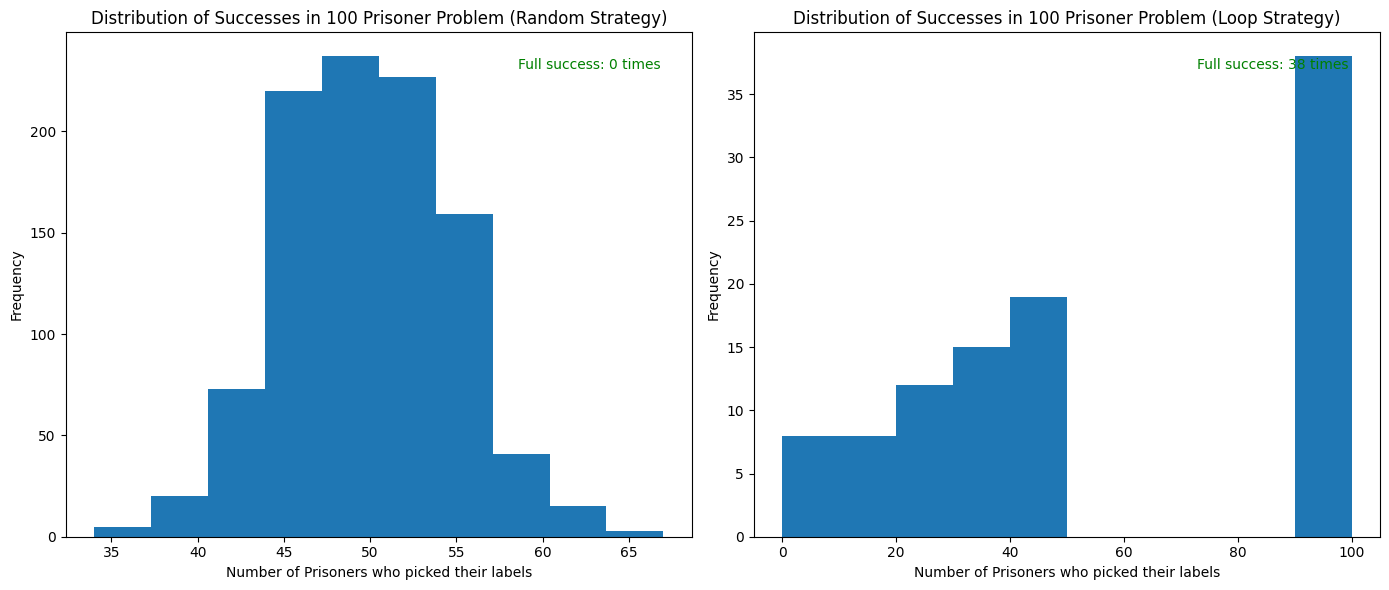

In [38]:
import matplotlib.pyplot as plt

# Assuming Loop_Startegy_results and random_result are defined earlier and contain data

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns, and figure size adjusted

# Plotting the first histogram on the first subplot for Random Strategy
axs[0].hist(random_result)
axs[0].set_xlabel('Number of Prisoners who picked their labels')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Successes in 100 Prisoner Problem (Random Strategy)')

# Calculate and print the frequency of 100 prisoners succeeding for Random Strategy
Number_of_Prisoners = 100
frequency = random_result.count(Number_of_Prisoners)
axs[0].text(0.95, 0.95, f"Full success: {frequency} times",
            verticalalignment='top', horizontalalignment='right',
            transform=axs[0].transAxes, color='green', fontsize=10)

# Plotting the second histogram on the second subplot for Loop Strategy
axs[1].hist(Loop_Startegy_results)
axs[1].set_xlabel('Number of Prisoners who picked their labels')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of Successes in 100 Prisoner Problem (Loop Strategy)')

# Calculate and print the frequency of 100 prisoners succeeding for Loop Strategy
frequency = Loop_Startegy_results.count(Number_of_Prisoners)
axs[1].text(0.95, 0.95, f"Full success: {frequency} times",
            verticalalignment='top', horizontalalignment='right',
            transform=axs[1].transAxes, color='green', fontsize=10)

# Display the plots side by side
plt.tight_layout()
plt.show()